In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
adult_df = pd.read_csv(r'C:\Users\HP\python_datasets\adult.csv', header=None, delimiter=' *, *', 
                      engine='python')  

In [3]:
adult_df.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
adult_df.isnull().sum() 

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [5]:
adult_df.columns = ['age','workclass','fnlwgt','education','education_num','marital_status',
             'occupation','relationship','race','sex','capital_gain','capital_loss',
             'hours_per_week','native_country','income']
adult_df.head() 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


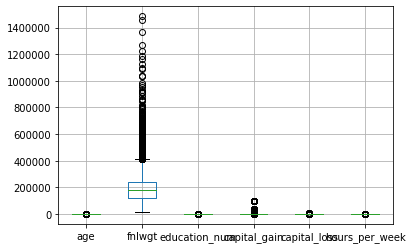

In [6]:
adult_df.boxplot() 
plt.show() 

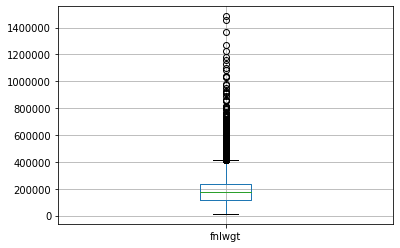

In [7]:
adult_df.boxplot(column='fnlwgt') 
plt.show() 

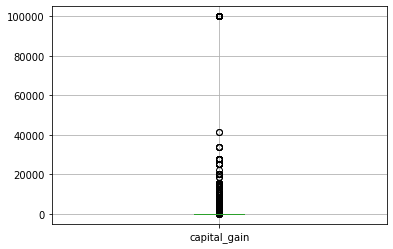

In [8]:
adult_df.boxplot(column='capital_gain') 
plt.show() 

In [9]:
adult_df.shape

(32561, 15)

In [10]:
adult_df.drop(adult_df[adult_df["capital_gain"]>80000].index, axis=0, inplace=True) 

In [11]:
adult_df.shape

(32402, 15)

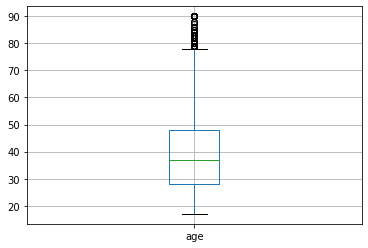

In [12]:
adult_df.boxplot(column='age') 
plt.show() 

In [13]:
q1 = adult_df['age'].quantile(0.25) #firt quartile value
q3 = adult_df['age'].quantile(0.75) #third quartile value
iqr = q3 - q1 #interquartile range
low = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

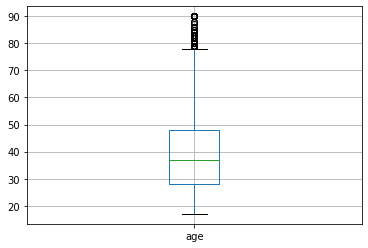

In [14]:
adult_df.boxplot(column='age') 
plt.show() 

In [18]:
adult_df_include = adult_df.loc[(adult_df['age'] >= low) &  (adult_df['age'] <= high)] 

adult_df_exclude = adult_df.loc[(adult_df['age'] < low) |  (adult_df['age'] > high)]  

In [19]:
print(adult_df_include.shape) 

(32259, 15)


In [20]:
print(adult_df_exclude.shape) 

(143, 15)


# Measure of central tendancy

In [21]:
age_mean = int(adult_df_include.age.mean()) #finding the mean of the acceptable range
print(age_mean) 

38


In [22]:
#imputing outlier values with mean value
adult_df_exclude.age = age_mean

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [23]:
#concatenating both dataframnes to get the original shape
adult_df_rev = pd.concat([adult_df_include, adult_df_exclude]) 
adult_df_rev.shape

(32402, 15)

# Capping approach

In [24]:
adult_df_exclude.loc[adult_df_exclude['age'] < low, "age"] = low
adult_df_exclude.loc[adult_df_exclude['age'] > high, "age"] = high

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


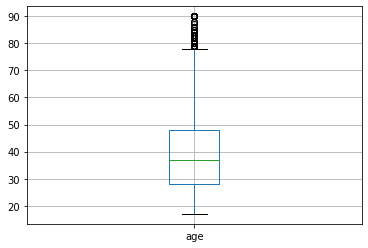

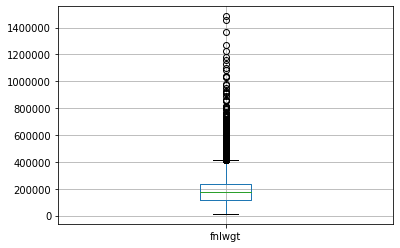

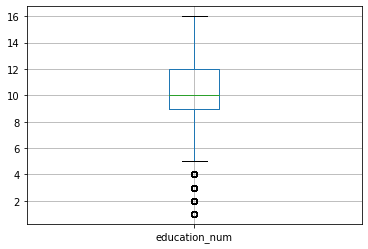

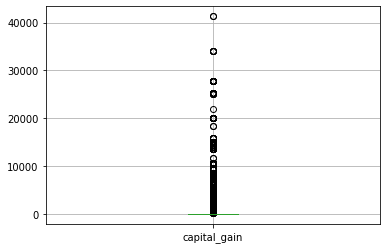

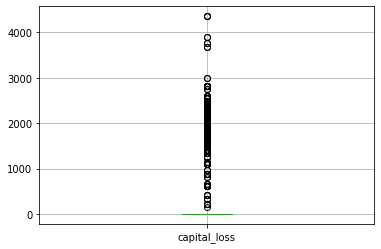

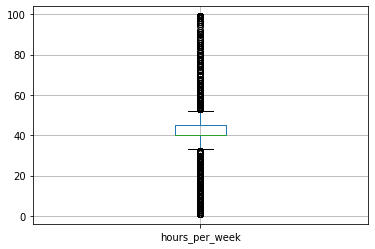

In [25]:
colname = [] 
for x in adult_df.columns[:-1]:
    if adult_df[x].dtype == "int64" or adult_df[x].dtype == "float64":
        colname.append(x) 
        
for x in colname:
    adult_df.boxplot(column=x) 
    plt.show() 